In [1]:
import pandas as pd   #importing all the important packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
plt.style.use('fivethirtyeight')

Cleaning up our data and refomatting
The data will be using has all of the Pokemon ID numbers, names, stats, generations, and legendary statuses. As you can see, some Pokemon have entries for mega evolutions as well, the first being on row three for Mega Venusaur. Mega evolutions are powered up versions of Pokemon, which is why they have different stats. They can only be used when in battle when it is holding its respective mega stone. Some even have more than one version, like with Mega Charizard X and Y.

In [2]:
Pokemon = pd.read_csv('Pokemon.csv', encoding = "ISO-8859-1")
Pokemon.head(10) 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


To make the column labels easier to read, I will make them all upper case. Also, we will not be using Pokemon ID numbers and would like to use Pokemon names as indices, which makes more sense when reading through the list of Pokemon. 

In [3]:
Pokemon.columns = Pokemon.columns.str.upper().str.replace('_', '') #change into upper case

Pokemon = Pokemon.set_index('NAME') #change and set the index to the name attribute
Pokemon.head()

Pokemon=Pokemon.drop(['#'],axis=1) #Removes Pokemon Number
Pokemon.head()

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Now we will be cleaning up some of the names in the data set for mega Pokemon and other variations, such as Alolan and Primal forms.

In [4]:
Pokemon.index = Pokemon.index.str.replace(".*(?=Mega)", "")
Pokemon.index = Pokemon.index.str.replace(".*(?=Alolan)", "")
Pokemon.index = Pokemon.index.str.replace(".*(?=Primal)", "")

Pokemon.head()

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Pokemon and their stats can now be found using their name.

In [7]:
print(Pokemon.loc['Alolan Raichu'])

TYPE 1        Electric
TYPE 2         Psychic
TOTAL              485
HP                  60
ATTACK              85
DEFENSE             50
SP. ATK             95
SP. DEF             85
SPEED              110
GENERATION           7
LEGENDARY        False
Name: Alolan Raichu, dtype: object


One of the first and most critical decisions any Pokemon trainer needs to make at the beginning of their journey is choosing their starter. This first example will be using only the starters in gneration 1, which most Pokemon fans are familiar with.

In [8]:
starters = Pokemon[(Pokemon.index == 'Bulbasaur') 
    | (Pokemon.index == 'Squirtle') 
    | (Pokemon.index == 'Charmander')]
starters

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


When looking at stat totals, Bulbasaur appears to be the best choice. However, choosing a starter Pokemon is all about its final potential, so it is best to look at final natural(non-mega) evolutions.

In [9]:
starters = Pokemon[(Pokemon.index == 'Venusaur') 
    | (Pokemon.index == 'Blastoise') 
    | (Pokemon.index == 'Charizard')]
starters

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


Despite having the best total stats initially, Bulbasaur receives the worst stats compared to the final evolutions of the remaining starters.

But this alone is still not enough to pick the right starter. Pokemon is not so simple! Every Pokemon has one or two typings which are critical to how it fairs against other Pokemon types. For example, fire type Pokemon can inflict double the damage against grass type Pokemon while grass only does half damage against fire. In order to determine how a Pokemon compares to other types, make a type effectiveness chart.

In [12]:
typeChart = [[1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
[1,1,2,1,1,.5,.5,1,1,1,1,1,1,2,1,1,.5,2],
[1,.5,1,1,0,2,.5,1,1,1,1,.5,2,1,2,1,1,1],
[1,.5,1,.5,2,1,.5,1,1,1,1,.5,1,2,1,1,1,.5],
[1,1,1,.5,1,.5,1,1,1,1,2,2,0,1,2,1,1,1],
[.5,2,.5,.5,2,1,1,1,2,.5,2,2,1,1,1,1,1,1],
[1,.5,2,1,.5,2,1,1,1,2,1,.5,1,1,1,1,1,1],
[0,0,1,.5,1,1,.5,2,1,1,1,1,1,1,1,1,2,1],
[.5,2,.5,0,2,.5,.5,1,.5,2,1,.5,1,.5,.5,.5,1,.5],
[1,1,1,1,2,2,.5,1,.5,.5,2,.5,1,1,.5,1,1,.5],
[1,1,1,1,1,1,1,1,.5,.5,.5,2,2,1,.5,1,1,1],
[1,1,2,2,.5,1,2,1,1,2,.5,.5,.5,1,2,1,1,1],
[1,1,.5,1,2,1,1,1,.5,1,1,1,.5,1,1,1,1,1],
[1,.5,1,1,1,1,2,2,1,1,1,1,1,.5,1,1,2,1],
[1,2,1,1,1,2,1,1,2,2,1,1,1,1,.5,1,1,1],
[1,1,1,1,1,1,1,1,1,.5,.5,.5,.5,1,2,2,1,2],
[1,2,1,1,1,1,2,.5,1,1,1,1,1,0,1,1,.5,2],
[1,.5,1,2,1,1,.5,1,2,1,1,1,1,1,1,0,.5,1]]

# Maps types to indices for typeChart
typeMap = dict({'Normal':0, 
                'Fighting':1,
                'Flying':2,
                'Poison':3,
                'Ground':4,
                'Rock':5,
                'Bug':6,
                'Ghost':7,
                'Steel':8,
                'Fire':9,
                'Water':10,
                'Grass':11,
                'Electric':12,
                'Psychic':13,
                'Ice':14,
                'Dragon':15,
                'Dark':16,
                'Fairy':17
               })

# Finds the effectiveness
def effectiveness(attacker,defender):
   return typeChart[typeMap[defender]][typeMap[attacker]]

This may look very confusing at first, but it is based on simple rules. As was stated before, some Pokemon match up better against certain types. The effectiveness function finds how effective an attack of a certain type is against another Pokemon type. To clarify the results, 0 means no effect, 0.5 is half damage, 1.0 is normal/neutral damage, and 2.0 is double damage. Here is an example.

In [14]:
effectiveness('Fire','Grass')

2

Using the effectiveness function, the type effectiveness potential can be calculated based on all Pokemon in its deneration. 

In [23]:
gen1 = Pokemon[Pokemon['GENERATION']==1]  #Generation 1 Pokemon

def effects(type1,type2):
    result = {}
    for index, row in Pokemon.iterrows():
        effect = effectiveness(type1,row['TYPE 1'])
        if not pd.isnull(row['TYPE 2']):
            effect += effectiveness(type1,row['TYPE 2'])
        if (type2 != ''):
            effect += effectiveness(type2,row['TYPE 1'])
            if not pd.isnull(row['TYPE 2']):
                effect += effectiveness(type2,row['TYPE 2'])
        if effect in result:
            result[effect] += 1
        else:
            result[effect] = 0
    return result


Venusaur = effects('Grass','Poison')
Blastoise = effects('Water','')
Charizard = effects('Fire','Flying')

print('Venusaur')
Venusaur 

Venusaur


{0.5: 5,
 1.0: 15,
 1.5: 76,
 2: 202,
 2.5: 109,
 3.0: 146,
 3.5: 119,
 4.0: 99,
 4.5: 57,
 5: 51,
 5.5: 30,
 6: 3}

To make this easier to understand, use a bar graph to display the results.

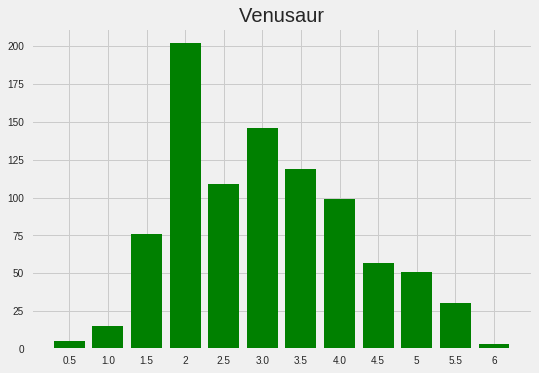

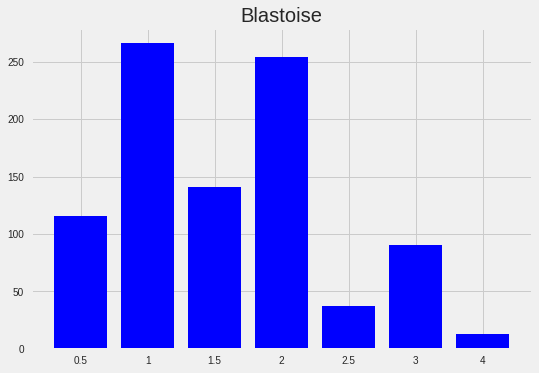

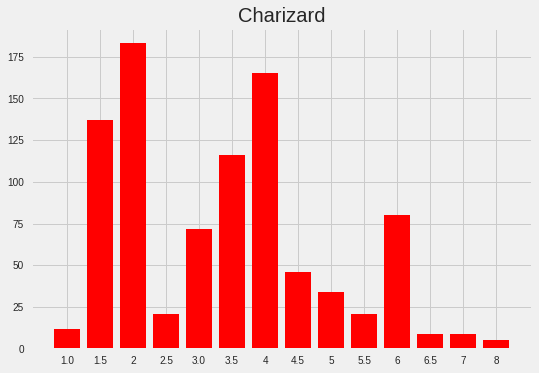

In [24]:
effectData = collections.OrderedDict(sorted(Venusaur.items(), key=lambda t: t[0]))
plt.bar(range(len(effectData)), effectData.values(), align='center', color = 'green')
plt.xticks(range(len(effectData)), list(effectData.keys()))
plt.title('Venusaur')

plt.show()

effectData = collections.OrderedDict(sorted(Blastoise.items(), key=lambda t: t[0]))
plt.bar(range(len(effectData)), effectData.values(), align='center', color = 'blue')
plt.xticks(range(len(effectData)), list(effectData.keys()))
plt.title('Blastoise')

plt.show()

effectData = collections.OrderedDict(sorted(Charizard.items(), key=lambda t: t[0]))
plt.bar(range(len(effectData)), effectData.values(), align='center', color = 'red')
plt.xticks(range(len(effectData)), list(effectData.keys()))
plt.title('Charizard')

plt.show()

The graphs show that Venusaur's typing has pretty consistent coverage with its typing, meaning it can cause good damage to many types of Pokemon. Blastoise has far less damage potential, because of its single typing, which doesn't give it as many options. Charizard has the widest range of potential, but it is not very consistent and has lower highs than the other two. This makes it more of a hit or miss Pokemon type when pinned against all the Pokemon of its generation. At this point, it becomes a choice of what type of coverage you rather have.

In case you would like to do further research on all starter Pokemon, because you can use different starter Pokemon in different games now, here are the final natural evolutions of all starter Pokemon. Graph their stat totals to find the one with the best stats.

In [29]:
 allStarters = Pokemon[(Pokemon.index == 'Venusaur') 
    | (Pokemon.index == 'Blastoise') 
    | (Pokemon.index == 'Charizard') 
    | (Pokemon.index == 'Meganium') 
    | (Pokemon.index == 'Typhlosion')
    | (Pokemon.index == 'Feraligatr') 
    | (Pokemon.index == 'Blaziken') 
    | (Pokemon.index == 'Sceptile') 
    | (Pokemon.index == 'Swampert')
    | (Pokemon.index == 'Torterra') 
    | (Pokemon.index == 'Infernape') 
    | (Pokemon.index == 'Empoleon')
    | (Pokemon.index == 'Serperior') 
    | (Pokemon.index == 'Emboar') 
    | (Pokemon.index == 'Samurott')
    | (Pokemon.index == 'Chesnaught') 
    | (Pokemon.index == 'Delphox') 
    | (Pokemon.index == 'Greninja')
    | (Pokemon.index == 'Decidueye') 
    | (Pokemon.index == 'Incineroar') 
    | (Pokemon.index == 'Primarina')]
allStarters



,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
Meganium,Grass,NaN,525,80,82,100,83,100,80,2,False
Typhlosion,Fire,NaN,534,78,84,78,109,85,100,2,False
Feraligatr,Water,NaN,530,85,105,100,79,83,78,2,False
Sceptile,Grass,NaN,530,70,85,65,105,85,120,3,False
Blaziken,Fire,Fighting,530,80,120,70,110,70,80,3,False
Swampert,Water,Ground,535,100,110,90,85,90,60,3,False


Make a histogram of the total stat results to better understand the spread.

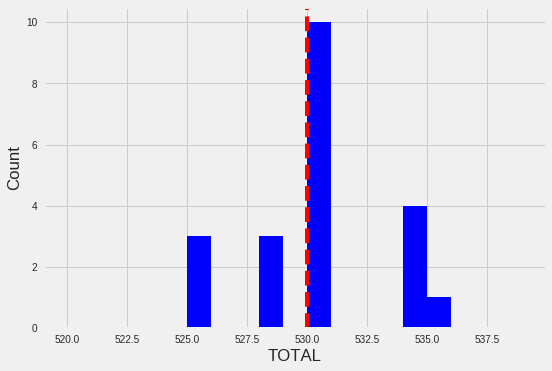

In [30]:
bins=range(520,540,1) #Total stat range for starter final Pokemon evolutions
plt.hist(allStarters["TOTAL"],bins,histtype="bar",rwidth=1.2,color='blue') #hist() is used to plot a histogram
plt.xlabel('TOTAL') #set the xlabel name
plt.ylabel('Count') #set the ylabel name
plt.plot()
plt.axvline(allStarters['TOTAL'].mean(),linestyle='dashed',color='red') #draw a vertical line showing the average Attack value
plt.show()

The histogram shows that most final evolutions for starter Pokemon have a 530 stat total and that the highest stat total is 535, which is Swampert. This makes sense as Swampert is still used in competitive Pokemon battles.

Moving on to the big picture. Choosing your starter Pokemon is very important in Pokemon, but there are still so many more Pokemon out there. In fact, there are 802 Pokemon now, not including different Alolan forms, mega evolutions, shiny Pokemon, and different genders. That's a lot of Pokemon! So in order to better understand the Pokemon world, you must have an understanding of each generation as a whole. First, count how many Pokemon are of each type using its primary typing(TYPE 1).

In [31]:
Pokemon.groupby(['TYPE 1']).size()

TYPE 1
Bug          79
Dark         37
Dragon       38
Electric     50
Fairy        19
Fighting     32
Fire         59
Flying        5
Ghost        38
Grass        84
Ground       37
Ice          29
Normal      110
Poison       35
Psychic      65
Rock         54
Steel        30
Water       123
dtype: int64

This provides a general idea of how much Pokemon there are for each type. As you can see, water is the most prevelant, or as IGN would say, "7.8/10 Too much water." Take a quick look at how grass type Pokemon compare to water type Pokemon by making a scatter plot comparing their defense and attack stats.

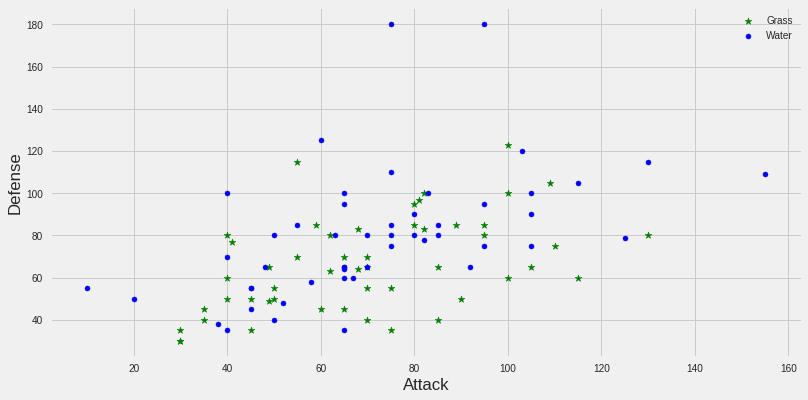

In [35]:
grass=Pokemon[(Pokemon['TYPE 1']=='Grass') | ((Pokemon['TYPE 2'])=="Grass")] #grass contains all grass type pokemon
water=Pokemon[(Pokemon['TYPE 1']=='Water') | ((Pokemon['TYPE 2'])=="Water")]  #all water type pokemon
plt.scatter(grass.ATTACK.head(50),grass.DEFENSE.head(50),color='G',label='Grass',marker="*",s=50) #scatter plot
plt.scatter(water.ATTACK.head(50),water.DEFENSE.head(50),color='B',label="Water",s=25)
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.legend()
plt.plot()
fig=plt.gcf()  #get the current figure using .gcf()
fig.set_size_inches(12,6) #set the size for the figure
plt.show()

The scatter plot shows that grass type Pokemon, water type Pokemon's type most common weakness, have much better attack stats, while water Pokemon have better defense.

To find the best Pokemon to counter each type, find the strongest Pokemon of each type.

In [36]:
strongest=Pokemon.sort_values(by='TOTAL', ascending=False) #sorting the rows in descending order
strongest.drop_duplicates(subset=['TYPE 1'],keep='first') #since the rows are now sorted in descending order
#thus we take the first row for every new type of pokemon i.e the table will check TYPE 1 of every pokemon
#The first pokemon of that type is the strongest for that type
#so we just keep the first row

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
Primal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
Primal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
Mega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
Mega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True


Notice how many of these Pokemon are legendaries or mega evolutions. This shows how much Mega evolutions can power up Pokemon enough to even compete statwise with legendary Pokemon.

Finally, use a violin plot to see how different Pokemon generations compare to one another with respect to total stats.

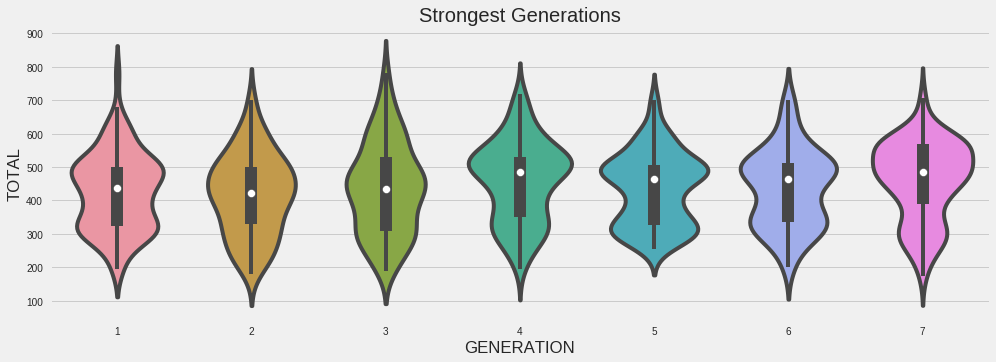

In [38]:
plt.subplots(figsize = (15,5))
plt.title('Strongest Generations')
sns.violinplot(x = "GENERATION", y = "TOTAL",data = Pokemon)
plt.show()

The violin plot shows that generation 3 has the strongest Pokemon. Another interesting thing to note is how top heavy the current generation's(7) Pokemon plot is very top heavy, indicating that most of its Pokemon are quite strong on average. 

In conclusion, there are several factors necessary to really become the very best like no one ever was in Pokemon. Choosing your starter is a bit more than just picking the one with the best stats. You must know how its typing matches up against the Pokemon in the rest of the game and understand your own battle style. As the Pokemon universe infinitely expands, it is important to keep track of how each generation is different and how to leverage new and old Pokemon to be a competitive Pokemon trainer. Good luck catching them all!